## Introduction

The submetric I decided to use is which neighborhood in Pittsburgh has the most fun. The data set I used to back this up was the frequency of block parties in said neighborhood. The data set I found doesn't supply the actual neighbor but the street names, so did research after the fact to determine which neighborhood the street name given falls in. I analyzed the data into two graphs, one being the Division or geopgrahic region the permit for the party fell in and the second is the streets with the most registered permits. 

Idea of what data I'm working with:

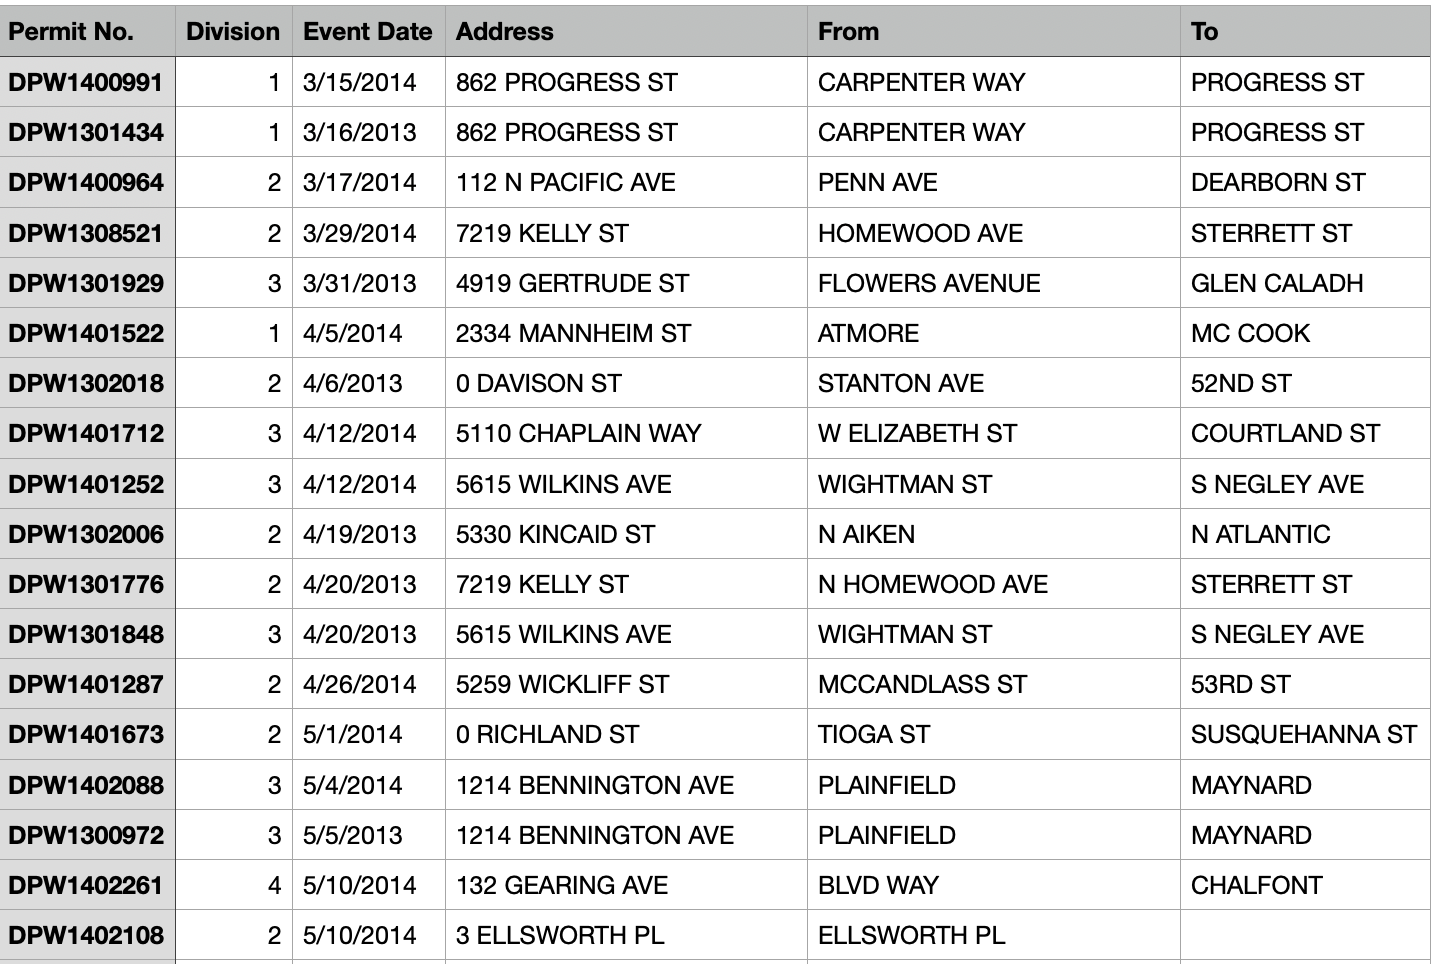

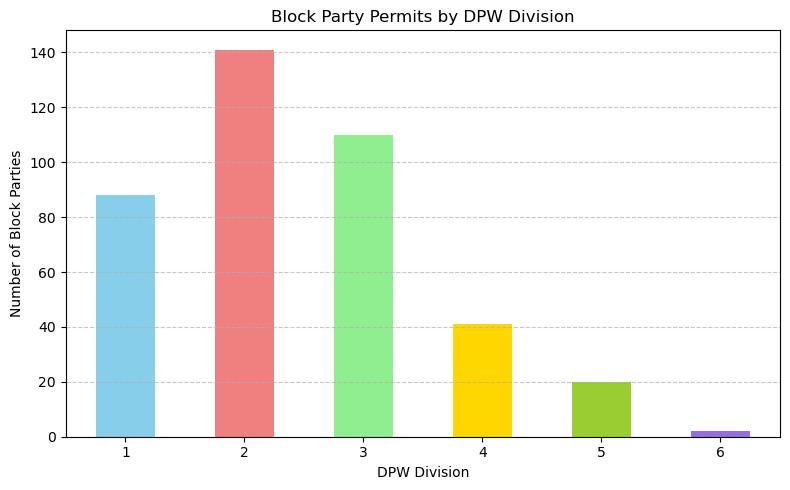

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Set the file name
file_name = "data.txt"

# load and read data, assumes 'data.txt' contains the CSV-formatted block party data 
#safety net
try:
    df = pd.read_csv(file_name)
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. ")
    # Exits the script if the file isn't found
    exit()

#Analysis 1: Most Active DPW Division  ---

# Drop rows with missing 'Division' data and convert the column to an integer type
df_division = df.dropna(subset=['Division']).copy()
df_division['Division'] = df_division['Division'].astype(int)

# Count the number of permits for each Division
division_counts = df_division['Division'].value_counts().sort_values(ascending=False)
most_active_division = division_counts.nlargest(1)
least_active_division = division_counts.nsmallest(1)

# Visualization 1 (DPW Division)
plt.figure(figsize=(8, 5))
division_counts.sort_index().plot(
    kind='bar',
    color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'yellowgreen', 'mediumpurple']
)
plt.title('Block Party Permits by DPW Division')
plt.xlabel('DPW Division')
plt.ylabel('Number of Block Parties')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() # Displays the first graph

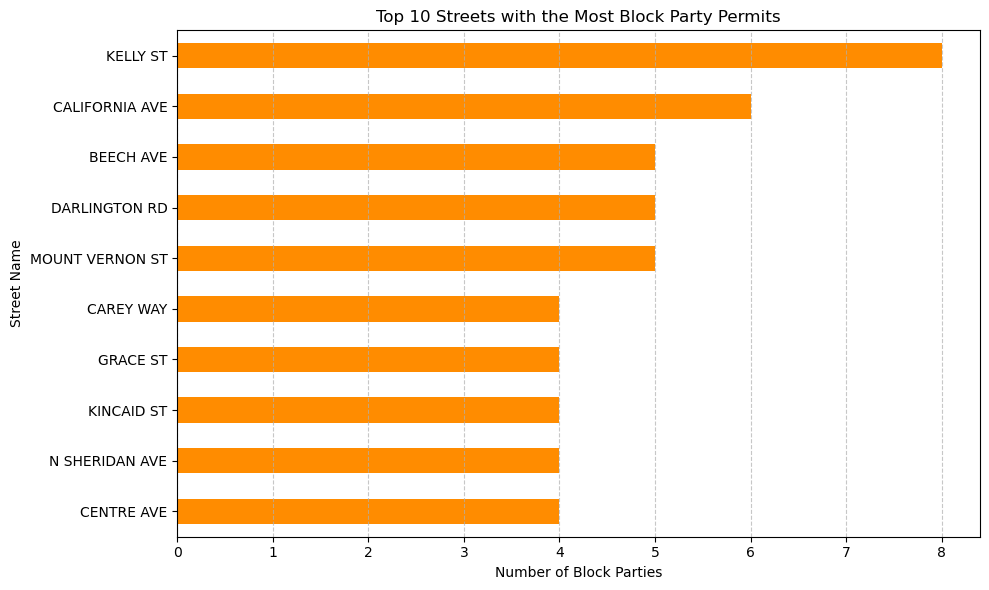

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Set the file name
file_name = "data.txt"

# load and read data, assumes 'data.txt' contains the CSV-formatted block party data 
#safety net
try:
    df = pd.read_csv(file_name)
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. ")
    # Exits the script if the file isn't found
    exit()

# --- 3. Analysis 2: Most Active Street (Most Granular Location) ---

# Function to extract the street name from the 'Address' column
def extract_street_name(address):
    if pd.isna(address):
        return None
    # Use regex to remove the leading building number(s) and any following space
    return re.sub(r'^\d+\s*', '', str(address).strip())

df['Street Name'] = df['Address'].apply(extract_street_name)

# Count the number of permits for each extracted street name
street_counts = df['Street Name'].value_counts()
most_active_street = street_counts.nlargest(1)
top_10_streets = street_counts.nlargest(10)

# Visualization 2 (Top 10 Streets)
plt.figure(figsize=(10, 6))
top_10_streets.sort_values(ascending=True).plot(kind='barh', color='darkorange')
plt.title('Top 10 Streets with the Most Block Party Permits')
plt.xlabel('Number of Block Parties')
plt.ylabel('Street Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() # Displays the second graph

## Conclusions

In [5]:
print("\n--- Consolidated Block Party Analysis (2013-2014) ---")

print("\n1. Most Active Area by DPW Division:")
print(f"Division with Most Parties: Division {most_active_division.index[0]} ({most_active_division.values[0]} parties)")

print("\n2. Most Active Area by Street Name (Most Granular Location):")
print(f"Street with Most Parties: {most_active_street.index[0]} ({most_active_street.values[0]} parties)")


--- Consolidated Block Party Analysis (2013-2014) ---

1. Most Active Area by DPW Division:
Division with Most Parties: Division 2 (141 parties)

2. Most Active Area by Street Name (Most Granular Location):
Street with Most Parties: KELLY ST (8 parties)


Kelly St. is in **Homewood South Pittsburgh**, making that the neighborhood with the most blockparties, thus making it the most fun. Who doesn't love a good block party. 